In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [3]:
df1=pd.read_csv('calories.csv')
df2=pd.read_csv('exercise.csv')


In [4]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df1=df1.drop(['User_ID'], axis=1)
df1

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14995,45.0
14996,23.0
14997,75.0
14998,11.0


In [6]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df=pd.concat([df2, df1], axis=1)

In [8]:
df


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [9]:
df.shape

(15000, 9)

In [10]:
df.info()   
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

EDA

In [13]:
df['Gender']

0          male
1        female
2          male
3        female
4        female
          ...  
14995    female
14996    female
14997    female
14998      male
14999      male
Name: Gender, Length: 15000, dtype: object

In [14]:
auto = df[['Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]

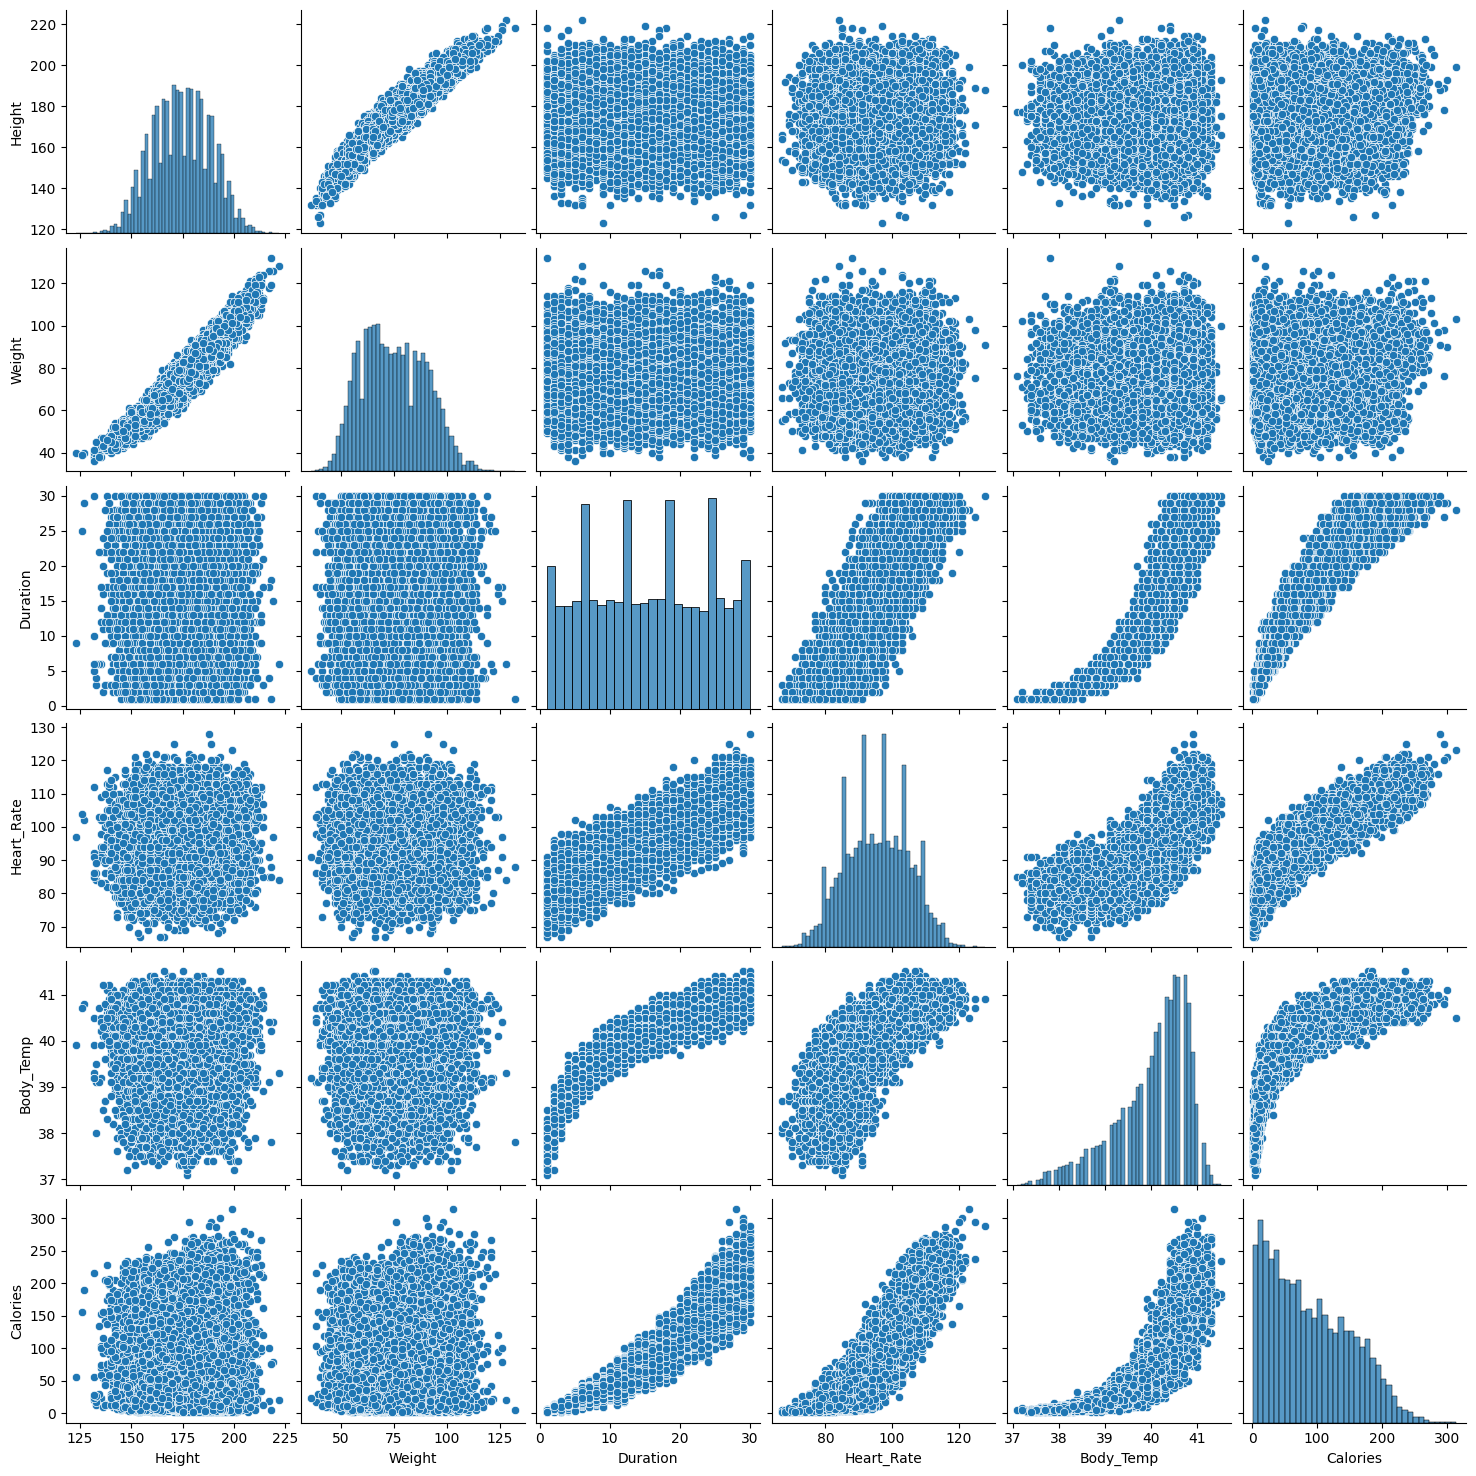

In [15]:
sns.pairplot(auto)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

df['Gender']=ord_enc.fit_transform(df[['Gender']]).astype(int)

In [17]:
df.drop(['User_ID'], axis=1, inplace=True)

In [18]:
df.corr()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


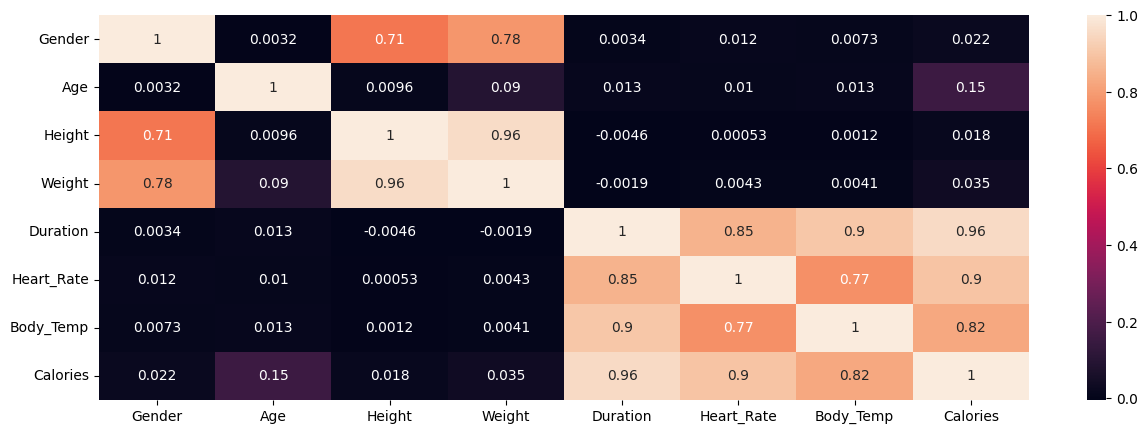

In [19]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
X= df.drop(['Calories'], axis=1)
y= df['Calories']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model= lr.fit(X_train, y_train)

In [23]:
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

print(f"Linear Regression Train Accuracy (R²): {train_score:.4f}")
print(f"Linear Regression Test Accuracy (R²): {test_score:.4f}")

Linear Regression Train Accuracy (R²): 0.9672
Linear Regression Test Accuracy (R²): 0.9673


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 8.44
MSE: 132.00
RMSE: 11.49


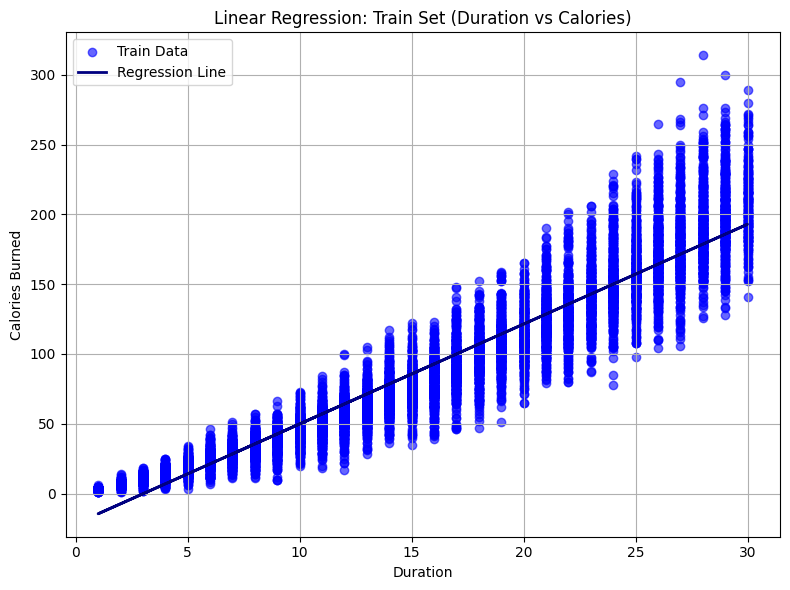

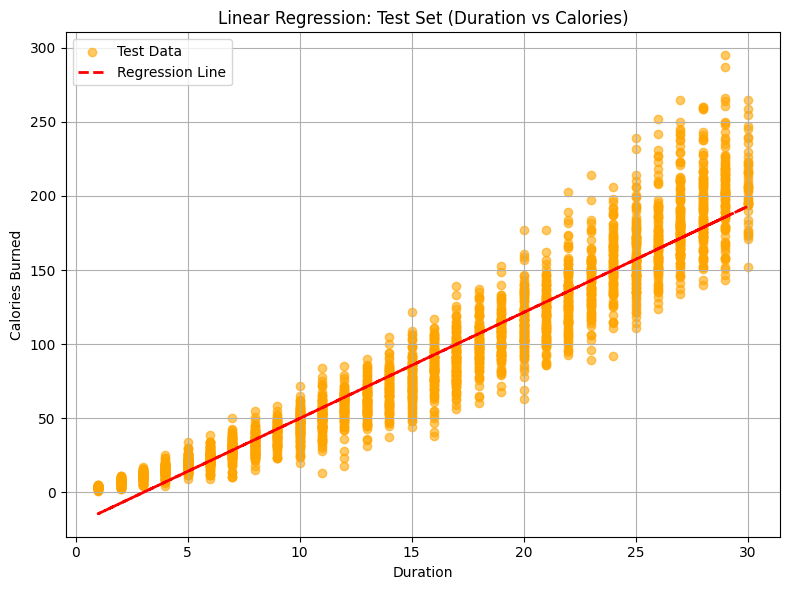

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Extracting only 'Duration' feature
X_train_duration = X_train[['Duration']]
X_test_duration = X_test[['Duration']]

# Fitting a simple Linear Regression model on training data
simple_model = LinearRegression()
simple_model.fit(X_train_duration, y_train)

# Predictions
train_preds = simple_model.predict(X_train_duration)
test_preds = simple_model.predict(X_test_duration)

# Plot 1: Train Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train_duration, y_train, color='blue', alpha=0.6, label='Train Data')
plt.plot(X_train_duration, train_preds, color='navy', linewidth=2, label='Regression Line')
plt.xlabel('Duration')
plt.ylabel('Calories Burned')
plt.title('Linear Regression: Train Set (Duration vs Calories)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Test Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_test_duration, y_test, color='orange', alpha=0.6, label='Test Data')
plt.plot(X_test_duration, test_preds, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Duration')
plt.ylabel('Calories Burned')
plt.title('Linear Regression: Test Set (Duration vs Calories)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


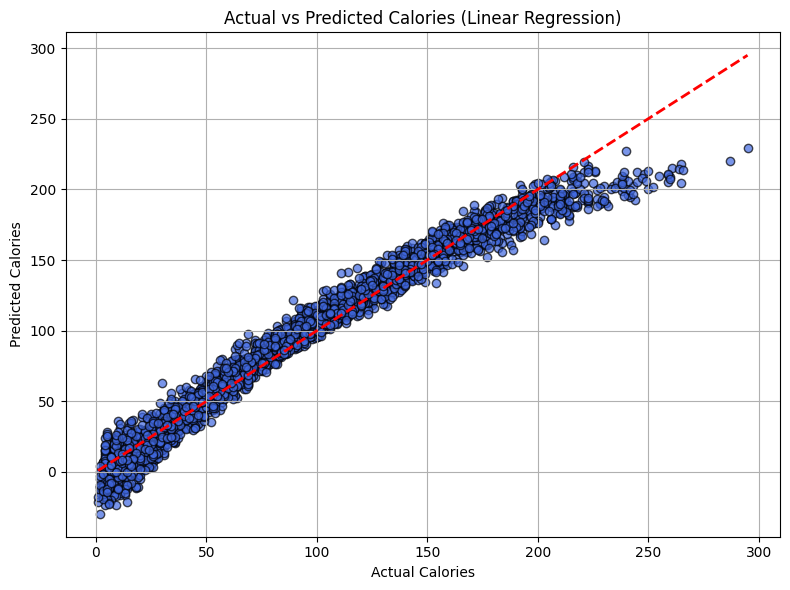

In [26]:
import matplotlib.pyplot as plt

# Predict using the trained model
y_pred = lr_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Model saved successfully!")
